# Reza Torabi 610300032
# Machine Learning - HW3: Q4

### A) Calculating Gradient(f(x)) and Hessian(f(x))

In [49]:
import numpy as np

In [50]:
def f(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

def gradient(x):
    grad1 = -400 * (x[1] - x[0] ** 2) * x[0] - 2 * (1 - x[0])
    grad2 = 200 * (x[1] - x[0] ** 2)
    return np.array([grad1, grad2])

def hessian(x):
    hess1 = -400 * x[1] + 1200 * x[0] ** 2 + 2
    hess2 = -400 * x[0]
    hess3 = 200
    return np.array([[hess1, hess2], [hess2, hess3]])

### B) Steepest Descent and Newton's Method

In [51]:
def steepest_descent(x0, epsilon = 1e-6, max_iter = 1000):
    x = x0
    history = [x]
    for _ in range(max_iter):
        grad = gradient(x)
        if np.linalg.norm(grad) < epsilon:
            break
        step_size = np.dot(grad, grad) / np.dot(grad, np.dot(hessian(x), grad))
        x = x - step_size * grad
        history.append(x)
    return np.array(history)

def newton_method(x0, epsilon = 1e-6, max_iter = 1000):
    x = x0
    history = [x]
    for _ in range(max_iter):
        grad = gradient(x)
        if np.linalg.norm(grad) < epsilon:
            break
        hess = hessian(x)
        x = x - np.linalg.inv(hess) @ (grad)
        history.append(x)
    return np.array(history)

x0 = np.array([-4, 10])
steepest_history = steepest_descent(x0)
newton_history = newton_method(x0)

### C) Comparison of Steepest Descent and Newton's Method

In [79]:
print("optimal x in steepest descent is:\n", steepest_history[-1])
print("number of iterations: ", len(steepest_history) - 1)
print("optimal x in newton's method is:\n", newton_history[-1])
print("number of iterations: ", len(newton_history) - 1)

optimal x in steepest descent is:
 [0.92319539 0.85166046]
number of iterations:  1000
optimal x in newton's method is:
 [1. 1.]
number of iterations:  5


### D) Plotting the results

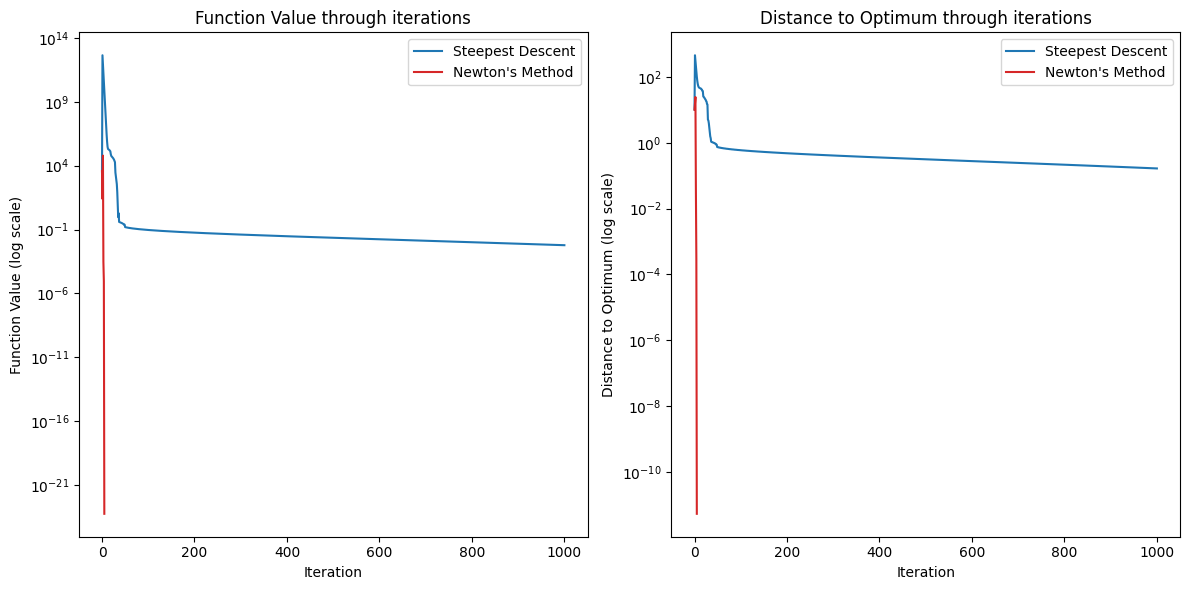

In [ ]:
import matplotlib.pyplot as plt

x_opt = np.array([1, 1])
steepest_values = [f(x) for x in steepest_history]
newton_values = [f(x) for x in newton_history]
steepest_distances = [np.linalg.norm(x - x_opt) for x in steepest_history]
newton_distances = [np.linalg.norm(x - x_opt) for x in newton_history]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(steepest_values, label = "Steepest Descent", color = "C0")
plt.plot(newton_values, label = "Newton's Method", color = "C3")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Function Value (log scale)")
plt.title("Function Value through iterations")
plt.legend()

# Distances
plt.subplot(1, 2, 2)
plt.plot(steepest_distances, label = "Steepest Descent", color = "C0")
plt.plot(newton_distances, label = "Newton's Method", color = "C3")
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Distance to Optimum (log scale)")
plt.title("Distance to Optimum through iterations")
plt.legend()
plt.tight_layout()
plt.show()